**Laboratorio de m√©todos cuantitativos aplicados a la Gesti√≥n**

---


Clase 7- Programaci√≥n lineal en Python

¬øQu√© vamos a poder hacer?

üßÆ Resolver problemas de optimizaci√≥n organizacional

üß© Formular modelos para objetivos empresariales e interpretar soluciones √≥ptimas.


In [1]:
#importamos las librer√≠as que vamos a usar en esta ocasi√≥n
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import pulp

**Repaso**:

En cualquier empresa, muchas de las decisiones que se toman tienen por objeto hacer el mejor uso posible (optimizaci√≥n) de los recursos de la misma.
ü§î Por recursos de una empresa entendemos la maquinaria que √©sta posea, sus trabajadores, capital financiero, instalaciones y materias primas.  Tales recursos pueden ser usados para fabricar productos o servicios.

**La Programaci√≥n Lineal es un modelo matem√°tico dise√±ado para ayudar en la planificaci√≥n y toma de decisiones referentes a la asignaci√≥n de los recursos.**

‚ñ∂ En cada problema de programaci√≥n lineal se deben tomar decisiones de maximizaci√≥n o minimizaci√≥n de objetivos representados por funciones lineales, las cuales est√°n sujetas a determinadas condiciones llamadas restricciones, que se representan a trav√©s de ecuaciones y/o desigualdades tambi√©n lineales.

Ejemplo: Si una compa√±√≠a produce cuatro bienes diferentes, la direcci√≥n puede usar Programaci√≥n Lineal para determinar las cantidades de recursos que asigna a la producci√≥n de cada uno de ellos (podr√≠a optar por hacer una asignaci√≥n ponderada, dedicar todos los recursos a la producci√≥n de un √∫nico bien abandonando la producci√≥n del resto, etc.).  


En el CBC aprendimos el m√©todo Simplex y tambi√©n un m√©todo gr√°fico. Vamos a ver qu√© herramientas nos provee este lenguaje de programaci√≥n para optimizar.

# Linprog

‚ñ∂La librer√≠a Scipy tiene la funci√≥n Linprog que resuleve problemas de optimizaci√≥n.

Supongamos que queremos minimizar la siguiente funci√≥n: $2x_1+2x_2$ sujeta a $x_1=x_2/3$ y $x_1+x_2=20$

### üìö C√≥mo usar LinProg de SciPy - Ejemplo introductorio

**LinProg** es la funci√≥n de SciPy para resolver problemas de programaci√≥n lineal. Sigue estos pasos:

1. **üéØ Definir la funci√≥n objetivo**: Los coeficientes en formato lista
2. **üìè Establecer restricciones**: Matriz de coeficientes y vector de constantes
3. **‚ö° Resolver**: Llamar a `linprog()` con los par√°metros
4. **üìä Interpretar**: Analizar el objeto resultado

**Recordatorio importante**: LinProg **siempre minimiza**, para maximizar usamos coeficientes negativos.

In [2]:
# EJEMPLO INTRODUCTORIO: Minimizar 2x‚ÇÅ + 2x‚ÇÇ sujeto a restricciones

# PASO 1: Definir los coeficientes de la funci√≥n objetivo
# La funci√≥n objetivo es: 2x‚ÇÅ + 2x‚ÇÇ (queremos minimizar)
# LinProg espera una lista con los coeficientes [coef_x1, coef_x2]
c = [2, 2]  # Lista con coeficientes: 2 para x‚ÇÅ y 2 para x‚ÇÇ

# PASO 2: Definir la matriz de coeficientes de las restricciones
# Restricci√≥n 1: x‚ÇÅ = x‚ÇÇ/3  =>  x‚ÇÅ - (1/3)x‚ÇÇ = 0  =>  1*x‚ÇÅ + (-1/3)*x‚ÇÇ = 0
# Restricci√≥n 2: x‚ÇÅ + x‚ÇÇ = 20  =>  1*x‚ÇÅ + 1*x‚ÇÇ = 20
# Cada fila representa una restricci√≥n, cada columna una variable
A = [[1, -1/3],    # Coeficientes de la primera restricci√≥n: [1, -1/3]
     [1, 1]]       # Coeficientes de la segunda restricci√≥n: [1, 1]

# PASO 3: Definir el vector de constantes (lado derecho de las restricciones)
# b[0] = 0 corresponde a la primera restricci√≥n (x‚ÇÅ - x‚ÇÇ/3 = 0)
# b[1] = 20 corresponde a la segunda restricci√≥n (x‚ÇÅ + x‚ÇÇ = 20)
b = [0, 20]  # Vector de t√©rminos independientes

# PASO 4: Resolver el problema de optimizaci√≥n
# linprog(c, A, b) busca el m√≠nimo de c¬∑x sujeto a A¬∑x = b
# El resultado se guarda en un objeto con m√∫ltiples atributos
res = linprog(c, A, b)

# PASO 5: Mostrar el resultado completo
# res contiene: soluci√≥n √≥ptima (x), valor √≥ptimo (fun), estado (success), etc.
res

       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00]
                marginals: [ 2.000e+00  2.000e+00]
         upper:  residual: [       inf        inf]
                marginals: [ 0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 0.000e+00  2.000e+01]
                marginals: [-0.000e+00 -0.000e+00]

## Caso 1

Una f√°brica produce dos productos, $x_1$ y
$ùë•_2$

La empresa quiere maximizar la cantidad total producida, es decir:

Maximizar
$ùëç=ùë•_1+x_2$

Sin embargo, enfrenta dos restricciones:

Cada producto $x_1$	consume 2 horas de m√°quina A y cada producto $ùë•_2$ consume 1 hora de m√°quina A. Solo hay 100 horas disponibles de m√°quina A.

Cada producto $ùë•_1$ consume 1 hora de m√°quina B y cada producto $x_2$ consume 1 hora de m√°quina B. Solo hay 80 horas disponibles de m√°quina B.

### üîß C√≥mo resolver con LinProg - Caso de Maximizaci√≥n

Para problemas de **maximizaci√≥n** con LinProg necesitamos:

1. **üîÑ Convertir a minimizaci√≥n**: Usar coeficientes negativos en la funci√≥n objetivo
2. **üìê Configurar restricciones**: Matriz A para coeficientes, vector b para constantes  
3. **‚öôÔ∏è Definir bounds**: Especificar que las variables son no negativas
4. **‚ö° Resolver y analizar**: Interpretar resultados (recordando el cambio de signo)

**Problema:** Maximizar la producci√≥n total sujeto a limitaciones de recursos.

In [3]:
# PROBLEMA: Maximizar Z = x‚ÇÅ + x‚ÇÇ (producci√≥n total)
# RESTRICCIONES:
#   2x‚ÇÅ + x‚ÇÇ ‚â§ 100  (horas de m√°quina A disponibles)
#   x‚ÇÅ + x‚ÇÇ ‚â§ 80    (horas de m√°quina B disponibles)  
#   x‚ÇÅ, x‚ÇÇ ‚â• 0      (no se puede producir cantidades negativas)

# PASO 1: Convertir maximizaci√≥n a minimizaci√≥n
# LinProg siempre minimiza, entonces para maximizar Z = x‚ÇÅ + x‚ÇÇ
# minimizamos -Z = -x‚ÇÅ - x‚ÇÇ (usamos coeficientes negativos)
c = [-1, -1]  # Coeficientes: [-1, -1] para minimizar -(x‚ÇÅ + x‚ÇÇ)

# PASO 2: Definir matriz de coeficientes de las restricciones
# Restricci√≥n 1: 2x‚ÇÅ + 1x‚ÇÇ ‚â§ 100  =>  coeficientes [2, 1]
# Restricci√≥n 2: 1x‚ÇÅ + 1x‚ÇÇ ‚â§ 80   =>  coeficientes [1, 1]
A = [[2, 1],     # Primera fila: coeficientes de la restricci√≥n de m√°quina A
     [1, 1]]     # Segunda fila: coeficientes de la restricci√≥n de m√°quina B

# PASO 3: Definir vector de l√≠mites (lado derecho de las desigualdades)
# b[0] = 100: l√≠mite de horas de m√°quina A
# b[1] = 80:  l√≠mite de horas de m√°quina B
b = [100, 80]

# PASO 4: Resolver el problema
# bounds=(0, None) especifica que todas las variables son ‚â• 0
# LinProg por defecto trata las restricciones como igualdades (A_eq, b_eq)
# Usamos A_ub, b_ub para desigualdades ‚â§ (upper bound)
res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))

# PASO 5: Mostrar resultado
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -80.0
              x: [ 0.000e+00  8.000e+01]
            nit: 2
          lower:  residual: [ 0.000e+00  8.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.000e+01  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [4]:
# INTERPRETAR LOS RESULTADOS

# res.x[0] contiene el valor √≥ptimo de la primera variable (x‚ÇÅ)
print("Producci√≥n √≥ptima de x1:", res.x[0])

# res.x[1] contiene el valor √≥ptimo de la segunda variable (x‚ÇÇ)  
print("Producci√≥n √≥ptima de x2:", res.x[1])

# res.fun contiene el valor √≥ptimo de la funci√≥n objetivo minimizada
# Como minimizamos -Z, el valor m√°ximo real de Z es -res.fun
print("Producci√≥n m√°xima:", -res.fun)

Producci√≥n √≥ptima de x1: 0.0
Producci√≥n √≥ptima de x2: 80.0
Producci√≥n m√°xima: 80.0


## Caso 2

Una refiner√≠a de petr√≥leo procesa dos tipos de crudo: A y B con la finalidad de producir gas o√≠l, lubricantes y kerosene. Las demandas de estos
productos son al menos respectivamente 14, 10 y 8 toneladas por d√≠a.
El crudo A tiene un rendimiento de 0,2 toneladas de gas o√≠l, 0,10 toneladas de lubricante y 0,16 toneladas de kerosene por cada tonelada de
petr√≥leo.
Los rendimientos del crudo B son: 0,10 toneladas de gas o√≠l, 0,20 toneladas de lubricante y 0,10 toneladas de kerosene.


*   Formular el modelo que permita determinar la capacidad m√≠nima de la planta en toneladas por d√≠a de crudo a procesar.
*   Determinar gr√°ficamente el espacio de soluciones factibles.
*   Determinar la cantidad de cada crudo a procesar y la capacidad m√≠nima de la planta utilizando el m√©todo gr√°fico.




Es un problema de minimizaci√≥n: queremos procesar lo m√≠nimo de crudo (A y B) cumpliendo demandas m√≠nimas.

Objetivo:
m√≠n   $Z= x_A +x_B$

Variables:
$x_A,x_B \geq 0$ (toneladas por d√≠a de crudo A y B.)

Restricciones:

Gasoil:      $0.2x_A+0.1x_B \geq 14\\$
Lubricantes: $0.1x_A+0.2x_B \geq 10\\$
Kerosene:    $0.16x_A+0.1x_B \geq 8\\$


### üîß C√≥mo resolver problemas con restricciones ‚â• (mayor o igual)

Para problemas de **minimizaci√≥n** con restricciones ‚â• necesitamos:

1. **üîÑ Convertir restricciones**: Cambiar ‚â• a ‚â§ multiplicando por -1
2. **üìê Usar A_ub y b_ub**: Para restricciones de desigualdad (upper bound ‚â§)
3. **‚öôÔ∏è Especificar m√©todo**: Usar "highs" para mayor eficiencia
4. **üìä Interpretar demandas**: Verificar que se cumplan las demandas m√≠nimas

**Problema:** Minimizar el procesamiento total de crudo cumpliendo demandas m√≠nimas.

In [5]:
# PROBLEMA: Minimizar Z = xA + xB (procesamiento total de crudo)
# RESTRICCIONES ORIGINALES (‚â•):
#   0.20xA + 0.10xB ‚â• 14  (demanda m√≠nima de gas o√≠l)
#   0.10xA + 0.20xB ‚â• 10  (demanda m√≠nima de lubricantes)  
#   0.16xA + 0.10xB ‚â• 8   (demanda m√≠nima de kerosene)

# PASO 1: Definir funci√≥n objetivo para minimizaci√≥n
# Queremos minimizar xA + xB (cantidad total de crudo procesado)
c = [1, 1]  # Coeficientes: [1, 1] significa minimizar 1*xA + 1*xB

# PASO 2: Convertir restricciones ‚â• a restricciones ‚â§
# LinProg trabaja con restricciones ‚â§, entonces multiplicamos por -1
# 0.20xA + 0.10xB ‚â• 14  =>  -0.20xA - 0.10xB ‚â§ -14
# 0.10xA + 0.20xB ‚â• 10  =>  -0.10xA - 0.20xB ‚â§ -10  
# 0.16xA + 0.10xB ‚â• 8   =>  -0.16xA - 0.10xB ‚â§ -8
A = [
    [-0.20, -0.10],  # Restricci√≥n 1 convertida: gas o√≠l
    [-0.10, -0.20],  # Restricci√≥n 2 convertida: lubricantes
    [-0.16, -0.10],  # Restricci√≥n 3 convertida: kerosene
]

# PASO 3: Definir vector de constantes (tambi√©n con signo cambiado)
b = [-14, -10, -8]  # T√©rminos independientes: [-14, -10, -8]

# PASO 4: Resolver el problema
# A_ub=A, b_ub=b especifica que son restricciones de desigualdad ‚â§ (upper bound)
# bounds=(0, None) indica que xA ‚â• 0 y xB ‚â• 0 (no negatividad)
# method="highs" usa el algoritmo HiGHS (m√°s eficiente para problemas grandes)
res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="highs")

# PASO 5: Mostrar resultado completo
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 80.0
              x: [ 6.000e+01  2.000e+01]
            nit: 2
          lower:  residual: [ 6.000e+01  2.000e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  3.600e+00]
                 marginals: [-3.333e+00 -3.333e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [6]:
# INTERPRETAR LOS RESULTADOS DEL CASO 2

# res.success indica si se encontr√≥ una soluci√≥n √≥ptima (True/False)
print("√âxito:", res.success)

# res.x[0] contiene la cantidad √≥ptima de crudo A a procesar
print(f"xA √≥ptimo: {res.x[0]:.2f} t/d√≠a")

# res.x[1] contiene la cantidad √≥ptima de crudo B a procesar  
print(f"xB √≥ptimo: {res.x[1]:.2f} t/d√≠a")

# res.fun es el valor m√≠nimo de la funci√≥n objetivo (procesamiento total m√≠nimo)
print(f"Procesamiento m√≠nimo (xA + xB): {res.fun:.2f} t/d√≠a")

√âxito: True
xA √≥ptimo: 60.00 t/d√≠a
xB √≥ptimo: 20.00 t/d√≠a
Procesamiento m√≠nimo (xA + xB): 80.00 t/d√≠a


### üìà Visualizaci√≥n del Caso 2 - Restricciones ‚â• (mayor o igual)

Para problemas con restricciones ‚â•, la regi√≥n factible est√° **por encima** de las rectas:

1. **üìê Convertir a ecuaciones**: Cambiar ‚â• por = para dibujar las fronteras
2. **üéØ Calcular regi√≥n factible**: Usar `np.maximum` para encontrar el √°rea v√°lida
3. **üé® Graficar restricciones**: Cada restricci√≥n define una frontera
4. **üåà Sombrear hacia arriba**: La regi√≥n v√°lida est√° por encima de las l√≠neas  
5. **‚≠ê Marcar el √≥ptimo**: Mostrar la soluci√≥n que minimiza el objetivo

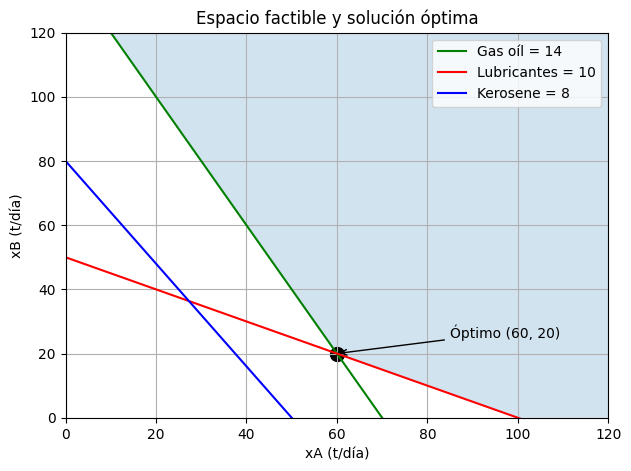

In [7]:
# PASO 1: Definir las rectas de frontera (convertir restricciones ‚â• en ecuaciones =)

# Creamos un rango de valores para xA (crudo A) de 0 a 120 toneladas/d√≠a
# np.linspace(inicio, fin, cantidad_puntos) genera 400 puntos equidistantes
xA = np.linspace(0, 120, 400)

# RESTRICCI√ìN 1: Gas o√≠l 0.20xA + 0.10xB = 14
# Despejamos xB: 0.10xB = 14 - 0.20xA  =>  xB = (14 - 0.20xA)/0.10
r1 = (14 - 0.20*xA)/0.10

# RESTRICCI√ìN 2: Lubricantes 0.10xA + 0.20xB = 10  
# Despejamos xB: 0.20xB = 10 - 0.10xA  =>  xB = (10 - 0.10xA)/0.20
r2 = (10 - 0.10*xA)/0.20

# RESTRICCI√ìN 3: Kerosene 0.16xA + 0.10xB = 8
# Despejamos xB: 0.10xB = 8 - 0.16xA  =>  xB = (8 - 0.16xA)/0.10
r3 = (8 - 0.16*xA)/0.10

# PASO 2: Calcular la regi√≥n factible (donde se cumplen TODAS las restricciones ‚â•)

# Para restricciones ‚â•, la regi√≥n factible est√° POR ENCIMA de todas las rectas
# np.maximum.reduce() toma el valor m√°ximo entre todas las restricciones en cada punto
# Tambi√©n incluimos xB ‚â• 0 usando np.zeros_like(xA)
xB_min = np.maximum.reduce([r1, r2, r3, np.zeros_like(xA)])

# PASO 3: Crear la figura y graficar las restricciones

# plt.figure() crea una nueva figura con tama√±o espec√≠fico (ancho=7, alto=5 pulgadas)
plt.figure(figsize=(7,5))

# plt.plot() dibuja cada l√≠nea de restricci√≥n con colores diferentes
# label= agrega texto para la leyenda identificando cada producto
plt.plot(xA, r1, label='Gas o√≠l = 14', color='green')     # Restricci√≥n de gas o√≠l
plt.plot(xA, r2, label='Lubricantes = 10', color='red')  # Restricci√≥n de lubricantes  
plt.plot(xA, r3, label='Kerosene = 8', color='blue')     # Restricci√≥n de kerosene

# PASO 4: Sombrear la regi√≥n factible

# plt.fill_between() rellena el √°rea entre dos curvas
# fill_between(xA, desde_xB, hasta_xB) sombrea desde xB_min hasta 200 (muy alto)
# alpha=0.2 hace el sombreado semitransparente para mejor visualizaci√≥n
plt.fill_between(xA, xB_min, 200, alpha=0.2)

# PASO 5: Marcar el punto √≥ptimo

# plt.scatter() dibuja el punto √≥ptimo encontrado por LinProg
# ([60], [20]) marca el punto (xA=60, xB=20) con un c√≠rculo negro grande
plt.scatter([60],[20], s=100,color='black')

# plt.annotate() agrega una etiqueta con flecha apuntando al punto √≥ptimo
# xytext= define d√≥nde colocar el texto, arrowprops= configura la flecha
plt.annotate("√ìptimo (60, 20)", (60,20), xytext=(85,25), arrowprops=dict(arrowstyle="->"))

# CONFIGURACI√ìN DEL GR√ÅFICO

# plt.xlim() y plt.ylim() definen los l√≠mites de los ejes
plt.xlim(0,120)  # Eje xA va de 0 a 120 toneladas/d√≠a
plt.ylim(0,120)  # Eje xB va de 0 a 120 toneladas/d√≠a

# plt.xlabel() y plt.ylabel() agregan etiquetas descriptivas a los ejes
plt.xlabel("xA (t/d√≠a)")  # Etiqueta del eje horizontal (crudo A)
plt.ylabel("xB (t/d√≠a)")  # Etiqueta del eje vertical (crudo B)

# plt.title() agrega un t√≠tulo descriptivo al gr√°fico
plt.title("Espacio factible y soluci√≥n √≥ptima")

# plt.legend() muestra una leyenda con las etiquetas de las l√≠neas
plt.legend()

# plt.grid(True) agrega una cuadr√≠cula para facilitar la lectura de valores
plt.grid(True)

# plt.show() muestra el gr√°fico final en pantalla
plt.show()


# Pulp

Una alternativa m√°s flexible es la librer√≠a PuLP, que permite formular modelos de optimizaci√≥n de manera m√°s clara (con nombres de variables y restricciones) y resolverlos con distintos solvers.

### üîß Configuraci√≥n del Solver

Por defecto, PuLP muestra mucha informaci√≥n t√©cnica del proceso de optimizaci√≥n (versi√≥n del solver, comandos internos, etc.). Para mantener la salida limpia y enfocada en los resultados, usamos:

```python
solver = pulp.PULP_CBC_CMD(msg=0)
prob.solve(solver)
```

Esto silencia la salida t√©cnica y muestra solo nuestros resultados.

Supongamos que queremos maximizar $3x+5y$ sujeta a $x+2y\leq10$ y $2x+y\leq12$

### üìö Ejemplo b√°sico con PuLP - Sintaxis intuitiva

**PuLP** hace la programaci√≥n lineal m√°s legible y natural:

1. **üéØ Crear problema**: Especificar si es maximizaci√≥n o minimizaci√≥n
2. **üìä Definir variables**: Crear variables con nombres descriptivos
3. **üéØ Funci√≥n objetivo**: Agregar directamente la expresi√≥n matem√°tica
4. **üìè Restricciones**: Escribir las limitaciones como ecuaciones/desigualdades
5. **‚ö° Resolver**: Ejecutar el solver y leer los resultados

**Ventaja**: La sintaxis es casi id√©ntica a la notaci√≥n matem√°tica.

In [8]:
# EJEMPLO B√ÅSICO: Maximizar 3x + 5y sujeto a x + 2y ‚â§ 10 y 2x + y ‚â§ 12

# PASO 1: Crear el problema de optimizaci√≥n
# LpProblem(nombre, tipo) crea un nuevo problema vac√≠o
# "Problema" es solo un nombre descriptivo que elegimos
# LpMaximize indica que queremos MAXIMIZAR la funci√≥n objetivo
prob = pulp.LpProblem("Problema", pulp.LpMaximize)

# PASO 2: Definir las variables de decisi√≥n
# LpVariable('nombre') crea una variable que PuLP va a optimizar
# Por defecto, las variables son ‚â• 0 (no negativas)
# 'x' e 'y' son los nombres que aparecer√°n en los resultados
x = pulp.LpVariable('x')
y = pulp.LpVariable('y')

# PASO 3: Definir la funci√≥n objetivo (lo que queremos maximizar)
# prob += expresi√≥n_matem√°tica agrega la funci√≥n objetivo al problema
# 3*x + 5*y es exactamente la expresi√≥n matem√°tica que queremos maximizar
# "Z" es un nombre opcional para identificar la funci√≥n objetivo
prob += 3*x + 5*y, "Z"

# PASO 4: Agregar las restricciones (limitaciones del problema)
# prob += restricci√≥n agrega una limitaci√≥n al problema
# La sintaxis es muy similar a escribir matem√°tica: variable operador valor

# Restricci√≥n 1: x + 2y ‚â§ 10
prob += x + 2*y <= 10

# Restricci√≥n 2: 2x + y ‚â§ 12  
prob += 2*x + y <= 12

# PASO 5: Resolver el problema de optimizaci√≥n
# Configuramos el solver para que no muestre informaci√≥n t√©cnica (msg=0)
solver = pulp.PULP_CBC_CMD(msg=0)
# solve(solver) ejecuta el algoritmo de optimizaci√≥n y devuelve un c√≥digo de estado
# El resultado 1 significa que se encontr√≥ una soluci√≥n √≥ptima
prob.solve(solver)



1

In [9]:
# INTERPRETAR LOS RESULTADOS DE PULP

# pulp.LpStatus[] convierte el c√≥digo num√©rico a texto legible
# prob.status contiene el estado de la soluci√≥n (1=√≥ptimo, 0=no factible, etc.)
print("Estado:", pulp.LpStatus[prob.status])

# .varValue contiene el valor √≥ptimo de cada variable despu√©s de resolver
# x.varValue es el valor √≥ptimo de la variable x
print("Valor √≥ptimo de x:", x.varValue)

# y.varValue es el valor √≥ptimo de la variable y
print("Valor √≥ptimo de y:", y.varValue)

# pulp.value(prob.objective) obtiene el valor √≥ptimo de la funci√≥n objetivo
# Es equivalente a evaluar 3*x.varValue + 5*y.varValue
print("Valor de la funci√≥n objetivo Z:", pulp.value(prob.objective))


Estado: Optimal
Valor √≥ptimo de x: 4.6666667
Valor √≥ptimo de y: 2.6666667
Valor de la funci√≥n objetivo Z: 27.333333600000003


## Caso 3

Una f√°brica de equipos electr√≥nicos construye amplificadores (x) y altoparlantes (y). Debido a su capacidad puede construir hasta 100 unidades diarias en total. Una convenci√≥n le obliga a exportar a otras provincias la mitad de los amplificadores que fabrica y la tercera parte de los altoparlantes, pero por un problema de transporte no puede exportar m√°s de 40 unidades por d√≠a. Cada amplificador deja un beneficio de 50 pesos y cada altoparlante deja 60 pesos.
* Plantear las restricciones y la funci√≥n objetivo.  
* Determinar qu√© producci√≥n de amplificadores y de altoparlantes maximiza el beneficio.
* Graficar el modelo indicando el conjunto de soluciones factibles.

Vamos a maximizar la funci√≥n de beneficio $Z= 50x +60y$ sujeta a
* $x+y \leq 100$ (capacidad)
* $\frac{1}{2}x+\frac{1}{3}y\leq40$ (exportaci√≥n)
* $x\geq0,y\geq0$

### üìö C√≥mo usar PuLP - Pasos para resolver un problema de optimizaci√≥n

**PuLP** nos permite formular problemas de optimizaci√≥n de manera intuitiva siguiendo estos 5 pasos:

1. **üéØ Crear el problema**: Definir si queremos maximizar o minimizar
2. **üìä Definir variables**: Crear las variables de decisi√≥n (x, y, etc.)
3. **üéØ Establecer funci√≥n objetivo**: Qu√© queremos optimizar
4. **üìè Agregar restricciones**: Limitaciones que debemos cumplir
5. **‚ö° Resolver**: Ejecutar el solver y obtener resultados

Veamos cada paso en detalle:

In [10]:
# PASO 1: Crear el problema de optimizaci√≥n
# LpProblem("nombre", tipo_optimizaci√≥n) crea un problema vac√≠o
# LpMaximize indica que queremos MAXIMIZAR la funci√≥n objetivo
prob = pulp.LpProblem("Caso 3", pulp.LpMaximize)

# PASO 2: Definir las variables de decisi√≥n
# LpVariable('nombre') crea una variable que PuLP va a determinar
# x = cantidad de amplificadores a producir
# y = cantidad de altoparlantes a producir
# Por defecto, las variables son >= 0 (no negativas)
x = pulp.LpVariable('x')
y = pulp.LpVariable('y')

# PASO 3: Definir la funci√≥n objetivo (lo que queremos maximizar)
# prob += expresi√≥n_matem√°tica agrega la funci√≥n objetivo al problema
# 50*x + 60*y = beneficio total (50 pesos por amplificador + 60 pesos por altoparlante)
# "Z" es solo un nombre descriptivo para la funci√≥n objetivo
prob += 50*x + 60*y, "Z"

# PASO 4: Agregar las restricciones (limitaciones del problema)
# prob += restricci√≥n agrega una limitaci√≥n al problema

# Restricci√≥n 1: Capacidad total de producci√≥n
# x + y <= 100 (no podemos producir m√°s de 100 unidades en total)
prob += x + y <= 100

# Restricci√≥n 2: Limitaci√≥n de exportaci√≥n
# 0.5*x + (1/3)*y <= 40 (exportamos 1/2 de amplificadores + 1/3 de altoparlantes <= 40)
prob += 0.5*x + 1/3*y <= 40

# Restricci√≥n 3 y 4: No negatividad (las variables deben ser >= 0)
# Aunque por defecto PuLP asume esto, es buena pr√°ctica especificarlo
prob += x >= 0
prob += y >= 0

# PASO 5: Resolver el problema
# Configuramos el solver para que no muestre informaci√≥n t√©cnica (msg=0)
solver = pulp.PULP_CBC_CMD(msg=0)
# solve(solver) ejecuta el algoritmo de optimizaci√≥n
prob.solve(solver)

# MOSTRAR RESULTADOS
# pulp.value(prob.objective) obtiene el valor √≥ptimo de la funci√≥n objetivo
# x.varValue y y.varValue obtienen los valores √≥ptimos de las variables
print(f'el beneficio m√°ximo alcanzado es {pulp.value(prob.objective)} cuando se fabrican {x.varValue} amplificadores y {y.varValue} altoparlantes')


el beneficio m√°ximo alcanzado es 6000.0 cuando se fabrican 0.0 amplificadores y 100.0 altoparlantes


/home/alexballera/Documents/uba/laboratorio-datos-fce/.venv/lib/python3.12/site-packages/pulp/pulp.py:1489: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


### üìä Interpretaci√≥n de Resultados

**Resultado obtenido:**
- **Amplificadores (x)**: 0 unidades
- **Altoparlantes (y)**: 100 unidades  
- **Beneficio m√°ximo**: $6,000

**¬øPor qu√© este resultado?**

1. **Mayor rentabilidad**: Los altoparlantes dan $60 vs $50 de los amplificadores
2. **Restricciones activas**: 
   - Capacidad: 0 + 100 = 100 ‚úÖ (se usa toda la capacidad)
   - Exportaci√≥n: 0.5(0) + (1/3)(100) = 33.33 < 40 ‚úÖ (no es limitante)
3. **Decisi√≥n √≥ptima**: Producir solo el producto m√°s rentable hasta agotar la capacidad

**Verificaci√≥n matem√°tica:**
- Si producimos solo altoparlantes: 100 √ó $60 = $6,000
- Si producimos solo amplificadores: 100 √ó $50 = $5,000
- ¬°Es l√≥gico producir solo altoparlantes!

Vamos a visualizar la soluci√≥n de esquina a la que hemos llegado en el gr√°fico del tercer inciso:

### üìà C√≥mo crear gr√°ficos de programaci√≥n lineal - Pasos para visualizar la soluci√≥n

**Matplotlib** nos permite visualizar problemas de programaci√≥n lineal siguiendo estos pasos:

1. **üìê Definir las rectas de frontera**: Convertir restricciones (‚â§) en ecuaciones (=)
2. **üéØ Calcular la regi√≥n factible**: Encontrar donde se cumplen todas las restricciones
3. **üé® Graficar las restricciones**: Dibujar las l√≠neas que limitan el espacio
4. **üåà Sombrear la regi√≥n**: Resaltar el √°rea donde est√°n las soluciones v√°lidas
5. **‚≠ê Marcar el punto √≥ptimo**: Mostrar la mejor soluci√≥n encontrada

Veamos cada paso aplicado a nuestro problema:

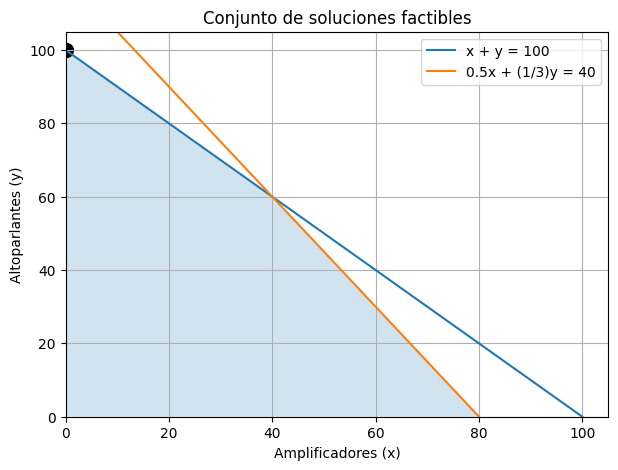

In [11]:
# PASO 1: Definir las rectas de frontera (convertir restricciones en ecuaciones)

# Creamos un rango de valores para x (amplificadores) de 0 a 100
# np.linspace(inicio, fin, cantidad_puntos) genera 400 puntos equidistantes
x = np.linspace(0, 100, 400)

# RESTRICCI√ìN 1: Capacidad total x + y = 100
# Despejamos y: y = 100 - x
# Esta l√≠nea representa el l√≠mite m√°ximo de producci√≥n total
y_cap = 100 - x

# RESTRICCI√ìN 2: Exportaci√≥n 0.5x + (1/3)y = 40
# Despejamos y: (1/3)y = 40 - 0.5x  =>  y = 3(40 - 0.5x) = 120 - 1.5x
# Esta l√≠nea representa el l√≠mite m√°ximo de exportaci√≥n
y_exp = 120 - 1.5*x

# PASO 2: Calcular la regi√≥n factible (donde se cumplen todas las restricciones)

# np.minimum() toma el menor valor entre las dos restricciones en cada punto
# La regi√≥n factible est√° por DEBAJO de ambas rectas (menor o igual)
y_factible = np.minimum(y_cap, y_exp)

# np.maximum() asegura que y >= 0 (no podemos producir cantidades negativas)
# La regi√≥n factible tambi√©n debe estar en el primer cuadrante
y_factible = np.maximum(y_factible, 0)

# PASO 3: Crear la figura y graficar las restricciones

# plt.figure() crea una nueva figura con tama√±o espec√≠fico (ancho=7, alto=5 pulgadas)
plt.figure(figsize=(7,5))

# plt.plot() dibuja las l√≠neas de las restricciones
# label= agrega texto para la leyenda
plt.plot(x, y_cap, label='x + y = 100')           # L√≠nea de capacidad total
plt.plot(x, y_exp, label='0.5x + (1/3)y = 40')   # L√≠nea de exportaci√≥n

# PASO 4: Sombrear la regi√≥n factible

# plt.fill_between() rellena el √°rea entre dos curvas
# fill_between(x, desde_y, hasta_y) sombrea desde y=0 hasta y=y_factible
# alpha=0.2 hace el sombreado semitransparente (0=transparente, 1=opaco)
plt.fill_between(x, 0, y_factible, alpha=0.2)

# PASO 5: Marcar el punto √≥ptimo

# plt.scatter() dibuja puntos espec√≠ficos en el gr√°fico
# ([0], [100]) marca el punto (x=0, y=100) que es nuestra soluci√≥n √≥ptima
# s=100 define el tama√±o del punto, color='black' lo hace negro
plt.scatter([0],[100], s=100,color='black')

# CONFIGURACI√ìN DEL GR√ÅFICO

# plt.xlim() y plt.ylim() definen los l√≠mites de los ejes x e y
plt.xlim(0, 105)  # Eje x va de 0 a 105 (un poco m√°s que 100 para mejor visualizaci√≥n)
plt.ylim(0, 105)  # Eje y va de 0 a 105

# plt.xlabel() y plt.ylabel() agregan etiquetas a los ejes
plt.xlabel('Amplificadores (x)')      # Etiqueta del eje horizontal
plt.ylabel('Altoparlantes (y)')       # Etiqueta del eje vertical

# plt.title() agrega un t√≠tulo al gr√°fico
plt.title('Conjunto de soluciones factibles')

# plt.legend() muestra una leyenda con las etiquetas de las l√≠neas
plt.legend()

# plt.grid(True) agrega una cuadr√≠cula para facilitar la lectura
plt.grid(True)

# plt.show() muestra el gr√°fico final en pantalla
plt.show()


### üîç Interpretaci√≥n del Gr√°fico

**¬øQu√© vemos en el gr√°fico?**

1. **L√≠nea azul (x + y = 100)**: Representa el l√≠mite de capacidad de producci√≥n
   - Todo lo que est√° **por debajo** de esta l√≠nea cumple con la restricci√≥n de capacidad

2. **L√≠nea naranja (0.5x + (1/3)y = 40)**: Representa el l√≠mite de exportaci√≥n
   - Todo lo que est√° **por debajo** de esta l√≠nea cumple con la restricci√≥n de exportaci√≥n

3. **√Årea sombreada (gris)**: La **regi√≥n factible**
   - Cualquier punto dentro de esta √°rea representa una soluci√≥n v√°lida
   - Todas las restricciones se cumplen simult√°neamente

4. **Punto negro (0, 100)**: La **soluci√≥n √≥ptima**
   - Es el punto de la regi√≥n factible que maximiza el beneficio
   - Est√° en una "esquina" de la regi√≥n factible (v√©rtice del pol√≠gono)

**¬øPor qu√© el √≥ptimo est√° en una esquina?**
En programaci√≥n lineal, la soluci√≥n √≥ptima siempre est√° en un v√©rtice de la regi√≥n factible. Esto se debe a que la funci√≥n objetivo es lineal, por lo que el m√°ximo (o m√≠nimo) se alcanza en los extremos de la regi√≥n.

## Caso 4

Vamos a adicionar variables de elecci√≥n y restricciones.

Una empresa agr√≠cola produce trigo (x1), ma√≠z (x2), soja (x3) y girasol (x4).
Dispone de tres recursos limitados:

* Tierra cultivable: 600 hect√°reas.

* Agua para riego: 1.200 m¬≥.

* Horas de trabajo: 1.000 horas

Cada cultivo requiere:


| Cultivo     | Tierra (ha) | Agua (m¬≥) | Trabajo (h) | Beneficio (\$/unidad) |
| ----------- | ----------- | --------- | ----------- | --------------------- |
| Trigo (x1)  | 5           | 4         | 3           | 40                    |
| Ma√≠z (x2)   | 3           | 2         | 5           | 50                    |
| Soja (x3)   | 2           | 5         | 2           | 60                    |
| Girasol(x4) | 5           | 3         | 4           | 55                    |


Restricciones:

El uso total de tierra no puede superar las 600 ha.

El uso total de agua no puede superar los 1.200 m¬≥.

El trabajo total no puede superar las 1.000 h.


Tenemos que maximizar el beneficio $Z=40x_1+50x_2+60x_3+55x_4$ sujeto a

$5x_1 + 3x_2 + 2x_3 + 5x_4 \leq 600\\
4x_1 + 2x_2 + 5x_3 + 3x_4 \leq 1200\\
3x_1 + 5x_2 + 2x_3 + 4x_4 \leq 1000$

### üîß Caso 4: Problemas con m√∫ltiples variables - Agricultura

Para problemas con **4 variables** y **m√∫ltiples restricciones**:

1. **üìä Variables descriptivas**: Usar nombres claros (Trigo, Maiz, Soja, Girasol)
2. **‚öôÔ∏è lowBound=0**: Especificar expl√≠citamente que las variables son no negativas
3. **üìè M√∫ltiples restricciones**: Una por cada recurso limitado (tierra, agua, trabajo)
4. **üîÑ Iteraci√≥n sobre variables**: Usar bucles para mostrar resultados de forma ordenada
5. **üí∞ Interpretaci√≥n econ√≥mica**: Analizar qu√© cultivos son m√°s rentables

**Ventaja de PuLP**: Maneja f√°cilmente problemas complejos con muchas variables.

In [12]:
# PROBLEMA AGR√çCOLA: Maximizar beneficio con 4 cultivos y 3 recursos limitados
# OBJETIVO: Maximizar Z = 40x‚ÇÅ + 50x‚ÇÇ + 60x‚ÇÉ + 55x‚ÇÑ (beneficio total)
# RESTRICCIONES:
#   Tierra:  5x‚ÇÅ + 3x‚ÇÇ + 2x‚ÇÉ + 5x‚ÇÑ ‚â§ 600 ha
#   Agua:    4x‚ÇÅ + 2x‚ÇÇ + 5x‚ÇÉ + 3x‚ÇÑ ‚â§ 1200 m¬≥  
#   Trabajo: 3x‚ÇÅ + 5x‚ÇÇ + 2x‚ÇÉ + 4x‚ÇÑ ‚â§ 1000 h

# PASO 1: Crear el problema de maximizaci√≥n
# "Problema agro" es un nombre descriptivo para identificar este problema
prob = pulp.LpProblem("Problema agro", pulp.LpMaximize)

# PASO 2: Definir las variables de decisi√≥n con nombres descriptivos
# lowBound=0 especifica expl√≠citamente que no se pueden producir cantidades negativas
# Los nombres aparecer√°n en los resultados finales para facilitar la interpretaci√≥n
x1 = pulp.LpVariable("Trigo", lowBound=0)     # Cantidad de trigo a producir
x2 = pulp.LpVariable("Maiz", lowBound=0)      # Cantidad de ma√≠z a producir  
x3 = pulp.LpVariable("Soja", lowBound=0)      # Cantidad de soja a producir
x4 = pulp.LpVariable("Girasol", lowBound=0)   # Cantidad de girasol a producir

# PASO 3: Definir la funci√≥n objetivo (beneficio total a maximizar)
# Cada cultivo aporta diferente beneficio por unidad producida
# 40*x1: beneficio del trigo ($40 por unidad)
# 50*x2: beneficio del ma√≠z ($50 por unidad)  
# 60*x3: beneficio de la soja ($60 por unidad)
# 55*x4: beneficio del girasol ($55 por unidad)
prob += 40*x1 + 50*x2 + 60*x3 + 55*x4

# PASO 4: Agregar las restricciones de recursos

# Restricci√≥n 1: Limitaci√≥n de tierra cultivable (600 hect√°reas disponibles)
# Cada cultivo consume diferente cantidad de tierra por unidad
prob += 5*x1 + 3*x2 + 2*x3 + 5*x4 <= 600

# Restricci√≥n 2: Limitaci√≥n de agua para riego (1200 m¬≥ disponibles)  
# Cada cultivo requiere diferente cantidad de agua por unidad
prob += 4*x1 + 2*x2 + 5*x3 + 3*x4 <= 1200

# Restricci√≥n 3: Limitaci√≥n de horas de trabajo (1000 horas disponibles)
# Cada cultivo demanda diferente cantidad de trabajo por unidad  
prob += 3*x1 + 5*x2 + 2*x3 + 4*x4 <= 1000

# PASO 5: Resolver el problema de optimizaci√≥n
# Configuramos el solver CBC para que no muestre informaci√≥n t√©cnica (msg=0)
solver = pulp.PULP_CBC_CMD(msg=0)
prob.solve(solver)

# PASO 6: Mostrar los resultados de forma organizada

print("Producci√≥n √≥ptima:")
# Iteramos sobre todas las variables del problema para mostrar sus valores √≥ptimos
for v in prob.variables():
    # v.name contiene el nombre descriptivo ("Trigo", "Maiz", etc.)
    # v.varValue contiene la cantidad √≥ptima a producir de cada cultivo
    print(f"{v.name} = {v.varValue}")

# pulp.value(prob.objective) calcula el beneficio m√°ximo total alcanzable
print("Beneficio m√°ximo =", pulp.value(prob.objective))


Producci√≥n √≥ptima:
Girasol = 0.0
Maiz = 54.545455
Soja = 218.18182
Trigo = 0.0
Beneficio m√°ximo = 15818.18195


# ü•á ‚ö° ü§ì Mini graficadora del espacio factible

### üõ†Ô∏è Herramienta Interactiva - Mini Graficadora de Programaci√≥n Lineal

Esta herramienta te permite **experimentar** con diferentes problemas de programaci√≥n lineal:

**üéØ Qu√© hace:**
- Solicita que ingreses tus propias restricciones
- Grafica autom√°ticamente la regi√≥n factible  
- Muestra visualmente c√≥mo se intersectan las restricciones

**üìã Formato de entrada:**
- `a b c tipo` donde `a*x + b*y tipo c`
- Ejemplo: `2 1 10 <=` significa `2x + 1y ‚â§ 10`
- Tipos v√°lidos: `<=`, `>=`, `=`

**üé® Salida visual:**
- L√≠neas de colores para cada restricci√≥n
- Regi√≥n factible sombreada en gris
- Cuadr√≠cula para facilitar la lectura

**üí° Uso educativo:** Ideal para experimentar y entender c√≥mo cambia la regi√≥n factible con diferentes restricciones.

### üìã C√ìMO USAR LA HERRAMIENTA - Versi√≥n Simplificada

**üéØ M√âTODO SIMPLE:** Modifica directamente el c√≥digo (no necesitas escribir en inputs)

**Problema ejemplo:** Maximizar Z = 3x + 2y sujeto a:
- x + y ‚â§ 8
- 2x + y ‚â§ 10  
- x ‚â• 0, y ‚â• 0

**PASOS A SEGUIR:**

**PASO 1:** Busca la lista llamada `restricciones` en el c√≥digo
**PASO 2:** Modifica la lista con tus restricciones usando el formato `(a, b, c, 'tipo')`

**EJEMPLO DE MODIFICACI√ìN:**
```python
restricciones = [
    (1, 1, 8, '<='),     # x + y ‚â§ 8
    (2, 1, 10, '<='),    # 2x + y ‚â§ 10
]
```

**PASO 3:** Ejecuta la celda ‚ñ∂Ô∏è 
**RESULTADO:** ¬°Gr√°fico autom√°tico con tu regi√≥n factible!

---

**üìê FORMATO:** `(a, b, c, 'tipo')` donde `a*x + b*y tipo c`

**M√ÅS EJEMPLOS:**
- Para `3x - 2y ‚â• 6` escribe: `(3, -2, 6, '>=')`
- Para `x ‚â§ 5` escribe: `(1, 0, 5, '<=')`  
- Para `4y = 8` escribe: `(0, 4, 8, '=')`

**VENTAJAS:**
‚úÖ Sin problemas de input
‚úÖ F√°cil de modificar y probar
‚úÖ C√≥digo reutilizable

### üìù Ejemplo paso a paso - C√≥mo usar la herramienta

**Supongamos que queremos graficar este problema:**
- Maximizar `Z = 3x + 2y`
- Sujeto a: `x + y ‚â§ 8`, `2x + y ‚â§ 10`, `x ‚â• 0`, `y ‚â• 0`

**Pasos a seguir:**

1. **Pregunta:** "¬øCu√°ntas restricciones vas a ingresar?"
   - **Respuesta:** `2` (solo contamos x+y‚â§8 y 2x+y‚â§10, las no-negatividad se asumen)

2. **Restricci√≥n 1:** "Ingresa (a b c tipo):"
   - **Respuesta:** `1 1 8 <=` (para x + y ‚â§ 8)

3. **Restricci√≥n 2:** "Ingresa (a b c tipo):"
   - **Respuesta:** `2 1 10 <=` (para 2x + y ‚â§ 10)

4. **Resultado:** Gr√°fico con la regi√≥n factible sombreada

**¬°Ahora int√©ntalo t√∫!**

üéØ MINI GRAFICADORA DE PROGRAMACI√ìN LINEAL - VERSI√ìN SIMPLE
üëÜ INSTRUCCIONES: Modifica la lista 'restricciones' debajo
   Formato: (a, b, c, 'tipo') para a*x + b*y tipo c

üìä RESTRICCIONES DEFINIDAS:
   1. 1x + 1y <= 8
   2. 2x + 1y <= 10

üé® Procesando restricciones...


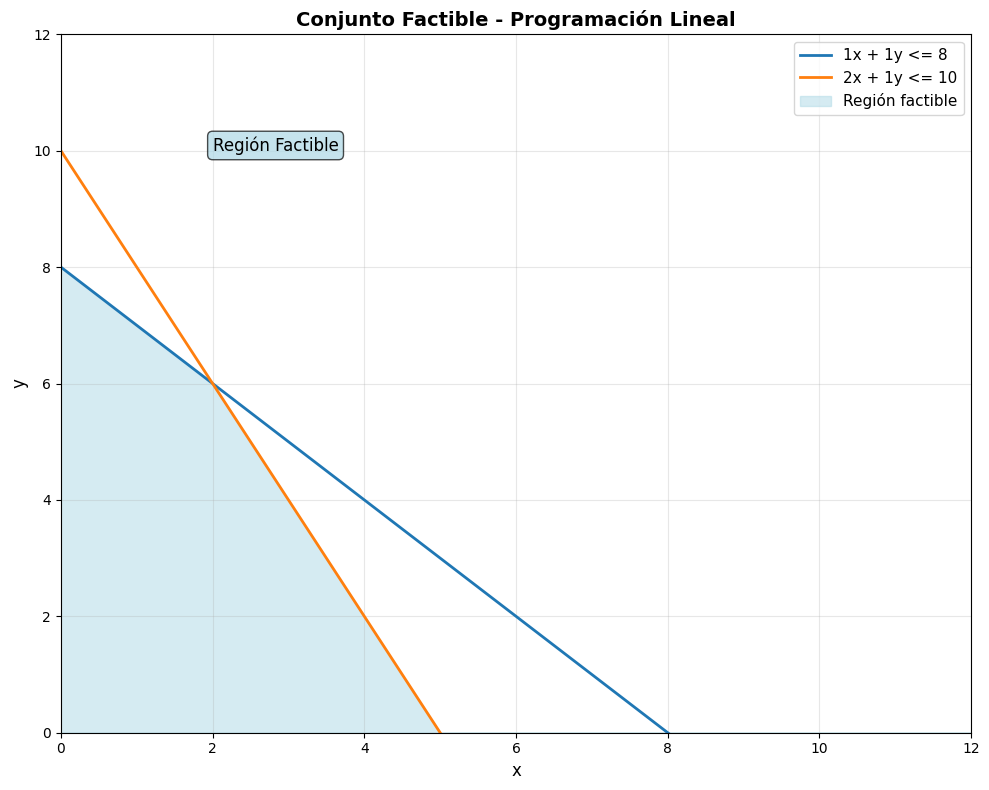

üéâ ¬°GR√ÅFICO COMPLETADO!
üìä La regi√≥n factible est√° sombreada en AZUL CLARO
üìà Las l√≠neas de colores son las restricciones
‚ú® Cualquier punto dentro del √°rea azul es una soluci√≥n v√°lida

üîß PARA CAMBIAR LAS RESTRICCIONES:
   1. Modifica la lista 'restricciones' arriba
   2. Vuelve a ejecutar esta celda
   3. ¬°Ver√°s tu nuevo gr√°fico!


In [14]:
# VERSI√ìN SIMPLIFICADA: Define tus restricciones directamente en el c√≥digo

print("üéØ MINI GRAFICADORA DE PROGRAMACI√ìN LINEAL - VERSI√ìN SIMPLE")
print("=" * 60)
print("üëÜ INSTRUCCIONES: Modifica la lista 'restricciones' debajo")
print("   Formato: (a, b, c, 'tipo') para a*x + b*y tipo c")
print()

# üìù MODIFICA ESTA LISTA CON TUS RESTRICCIONES:
# Formato: (a, b, c, 'tipo') donde representa a*x + b*y tipo c
# Ejemplos:
#   (1, 1, 8, '<=')   significa  x + y ‚â§ 8
#   (2, 1, 10, '<=')  significa  2x + y ‚â§ 10
#   (1, -1, 0, '>=')  significa  x - y ‚â• 0

restricciones = [
    (1, 1, 8, '<='),     # x + y ‚â§ 8
    (2, 1, 10, '<='),    # 2x + y ‚â§ 10
]

print("üìä RESTRICCIONES DEFINIDAS:")
for i, (a, b, c, tipo) in enumerate(restricciones, 1):
    print(f"   {i}. {a}x + {b}y {tipo} {c}")
print()

# Resto del c√≥digo de graficaci√≥n...
x = np.linspace(0, 15, 400)
plt.figure(figsize=(10, 8))

y_todas = []

print("üé® Procesando restricciones...")
for (a, b, c, tipo) in restricciones:
    if b != 0:
        y = (c - a*x)/b
        y_todas.append((y, tipo))
        plt.plot(x, y, label=f"{a}x + {b}y {tipo} {c}", linewidth=2)
    else:
        x_val = c/a
        plt.axvline(x_val, label=f"{a}x {tipo} {c}", color='red', linewidth=2)

# Calcular regi√≥n factible
y_factible = np.full_like(x, np.inf)

for (y, tipo) in y_todas:
    if tipo == "<=":
        y_factible = np.minimum(y_factible, y)
    elif tipo == ">=":
        y_factible = np.maximum(y_factible, y)

y_factible = np.maximum(y_factible, 0)

# Graficar
plt.fill_between(x, 0, y_factible, color="lightblue", alpha=0.5, label="Regi√≥n factible")

plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Conjunto Factible - Programaci√≥n Lineal", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Agregar anotaciones
plt.text(2, 10, "Regi√≥n Factible", fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

print("üéâ ¬°GR√ÅFICO COMPLETADO!")
print("üìä La regi√≥n factible est√° sombreada en AZUL CLARO")
print("üìà Las l√≠neas de colores son las restricciones")
print("‚ú® Cualquier punto dentro del √°rea azul es una soluci√≥n v√°lida")
print()
print("üîß PARA CAMBIAR LAS RESTRICCIONES:")
print("   1. Modifica la lista 'restricciones' arriba")
print("   2. Vuelve a ejecutar esta celda")
print("   3. ¬°Ver√°s tu nuevo gr√°fico!")


# Comparemos Pulp y Linprog

## üìä Comparaci√≥n entre `linprog` (SciPy) y `PuLP`

| Aspecto | `linprog` (SciPy) | `PuLP` |
|---------|------------------|--------|
| **Enfoque** | Pensado para **resolver r√°pido** problemas de optimizaci√≥n. | Pensado para **formular modelos de forma clara** y cercana a la notaci√≥n matem√°tica. |
| **Forma de uso** | Siempre **minimiza**, por lo que para maximizar hay que invertir el signo de la funci√≥n objetivo. | Permite elegir **Maximize** o **Minimize** expl√≠citamente. |
| **Sintaxis** | Se trabaja con **listas/matrices** de coeficientes (m√°s algebraico, menos intuitivo para principiantes). | Se trabaja con **objetos y restricciones declaradas** (m√°s legible y did√°ctico). |
| **Interpretaci√≥n de resultados** | Retorna un objeto con atributos (ej. `res.x`, `res.fun`). | Las variables tienen valores asignados directamente (ej. `x.value()`). |



-Actividad propuesta:
Una panader√≠a produce pan y medialunas,
Un pan requiere 1 hora de horno y 0.5h de mano de obra, una medialuna requiere 2 horas de horno y 1h de mano de obra. Disponibilidad: 160 horas de horno, 90h de mano de obra. Ganancias: 50 pesos el pan, 80 pesos la medialuna.
* Encontrar el beneficio m√°ximo.
* Formular otro problema de optimizaci√≥n para una panader√≠a que produce pan y medialunas y resolverlo, incluyendo un gr√°fico del conjunto de soluciones factibles.


Fuentes:

Notas de √°lgebra te√≥rico-pr√°cticas: c√°tedra de √Ålgebra / Alicia Delia Fraquelli;Andrea Leonor Gache. - 1a ed. - Ciudad Aut√≥noma de Buenos Aires: Universidad de Buenos Aires. Facultad de Ciencias Econ√≥micas, 2019.

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O‚ÄôReilly Media.

James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning: with Applications in Python. Springer.